# WebScraping MaltaPark

In this project I shall scrape postings from Maltapark. First I will create an automated browser which shall go to the following homepage:
https://maltapark.com/

The user will be prompted to enter search keywords. The script will then repeatedly scrape the listings titles, their prices and URLS, and then press the "next" button. When the "next" button is pressed and the URL does not change (ie. end of results), the script shall stop attempting to scrape. The results shall be populated in a pandas dataframe. The prices are plotted and the most common keywords are displayed in a WordCloud.



> **Set up**

This section sets up the environment.


In [ ]:
#@title
!pip install kora -q
from kora.selenium import wd
from selenium.webdriver.common.keys import Keys
import pandas as pd
import time
import cv2
from google.colab.patches import cv2_imshow

     |████████████████████████████████| 61kB 3.2MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 




> **Functions**

This section sets up the functions.



In [ ]:
#@title
def Scroll_down(Num):
   page_body = wd.find_element_by_css_selector("body")
   x=1
   while (x<=Num):
       page_body.send_keys(Keys.ARROW_DOWN)
       x=x+1

def ShowScreen():
  wd.save_screenshot("screenshot.png")
  screenshot = cv2.imread("screenshot.png")
  cv2_imshow(screenshot)

def GetItems():
  header = wd.find_elements_by_css_selector("a.header")
  price = wd.find_elements_by_css_selector("span.price")

  header_text = [x.text for x in header]
  header_link = [x.get_attribute("href") for x in header]
  item_price = [x.text for x in price]
  item_price = [x.replace("BUY ONLINE","") for x in item_price]
  item_price = [x.replace("€","") for x in item_price]
  item_price = [x.replace(",","") for x in item_price]

  items = pd.DataFrame({
    "title":header_text,
    "price": item_price,
    "link": header_link
  })
  return(items)



> **Search Keywords**



In [ ]:
#@title
mysearch = input("Please enter search: ")

Please enter search: guitar


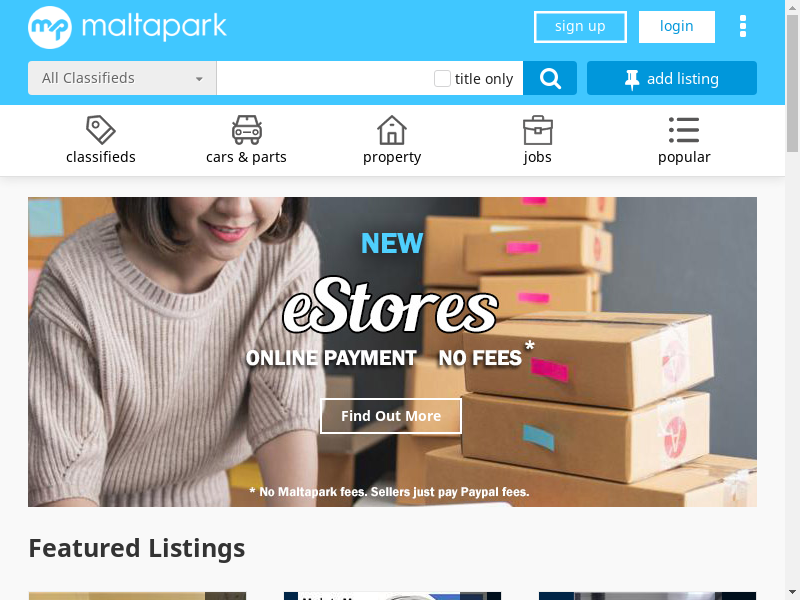

In [ ]:
#@title
wd.get("https://maltapark.com/")
wd.maximize_window()
ShowScreen()



> **First page**



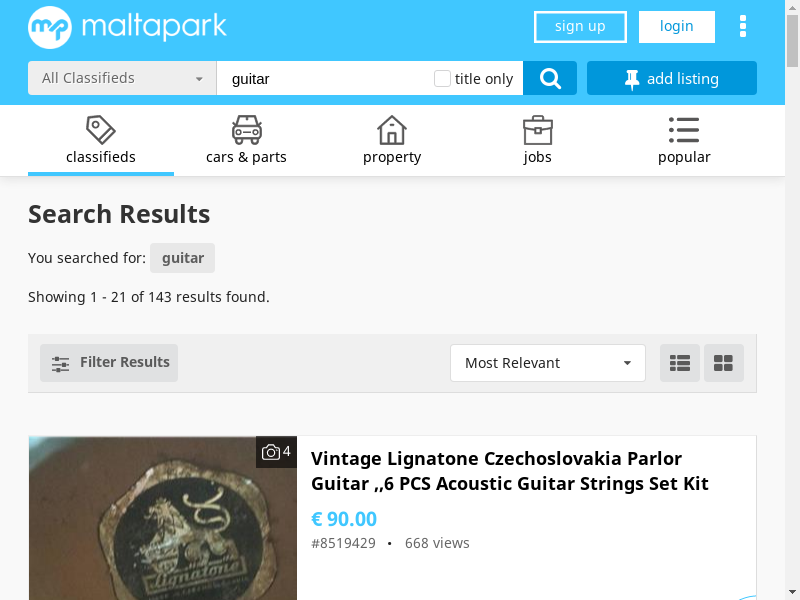

In [ ]:
#@title
search_bar = wd.find_element_by_id("search")
search_bar.send_keys(mysearch)
search_bar.send_keys(Keys.ENTER)
ShowScreen()



> **Iterations**



We are in iteration:1


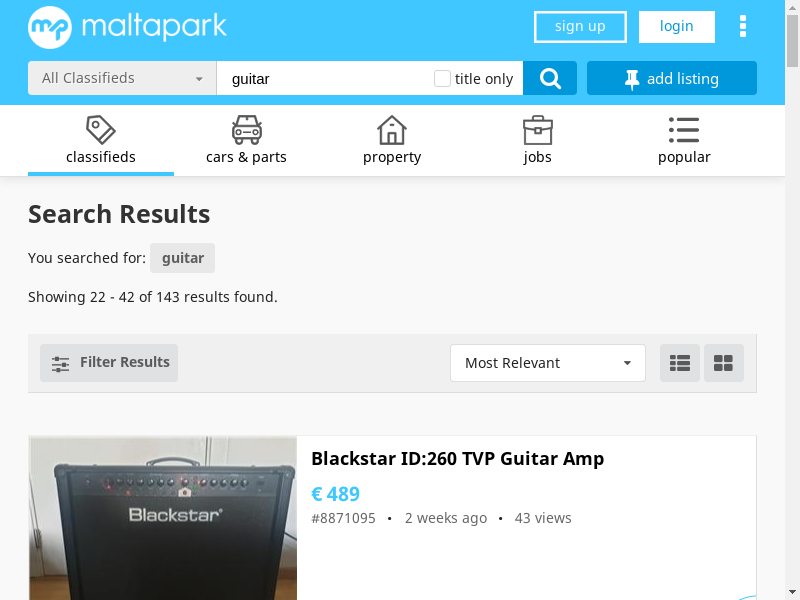

We are in iteration:2


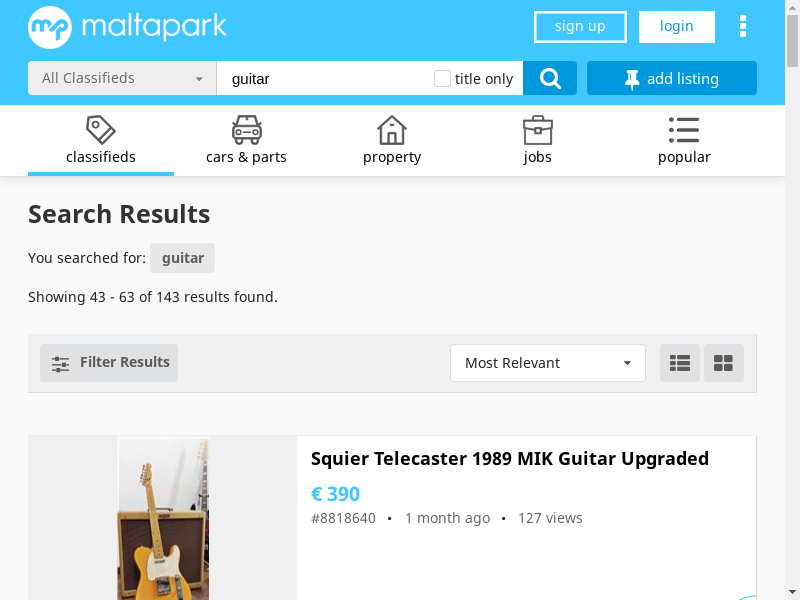

We are in iteration:3


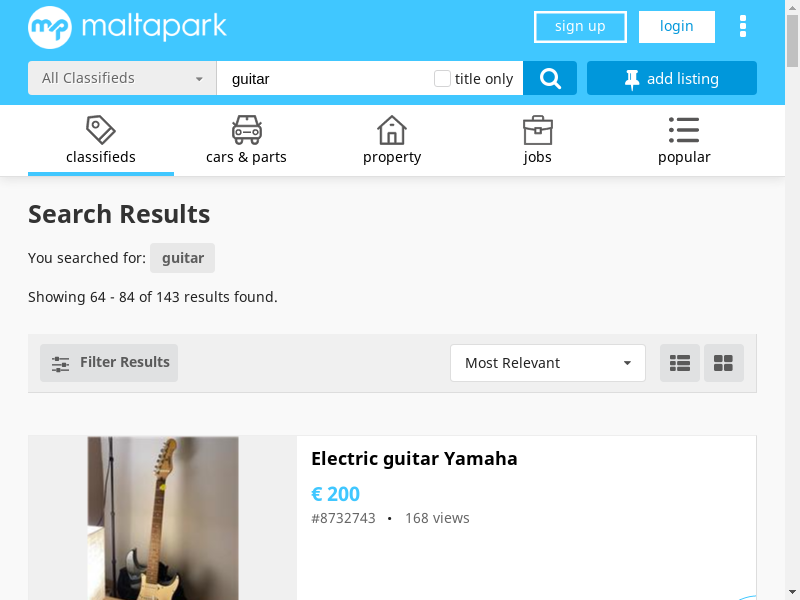

We are in iteration:4


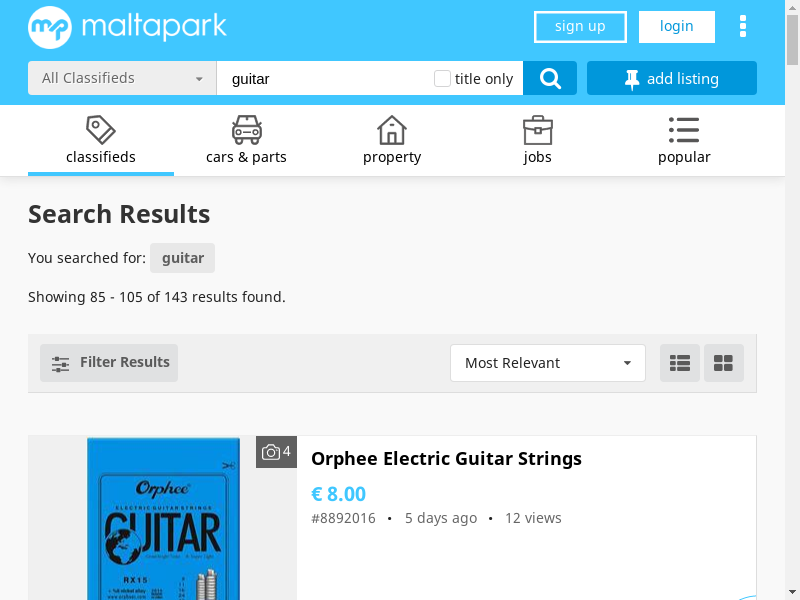

We are in iteration:5


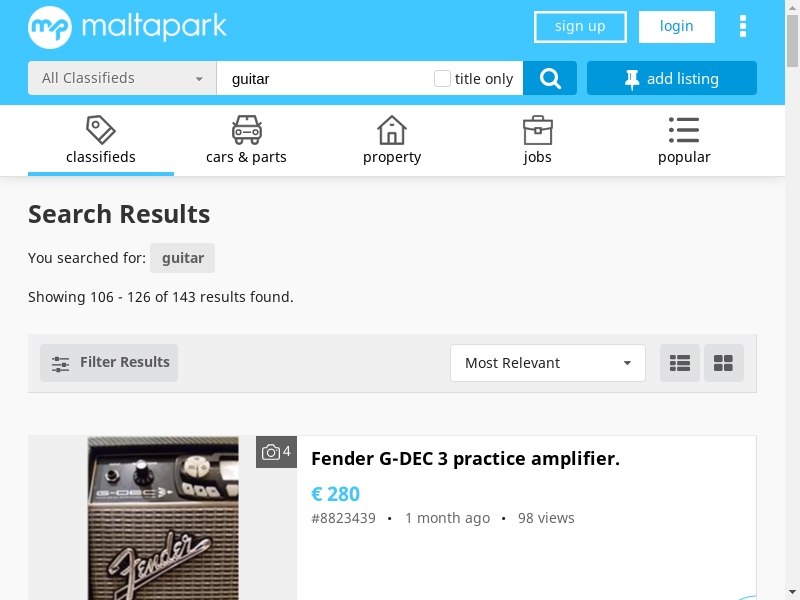

We are in iteration:6


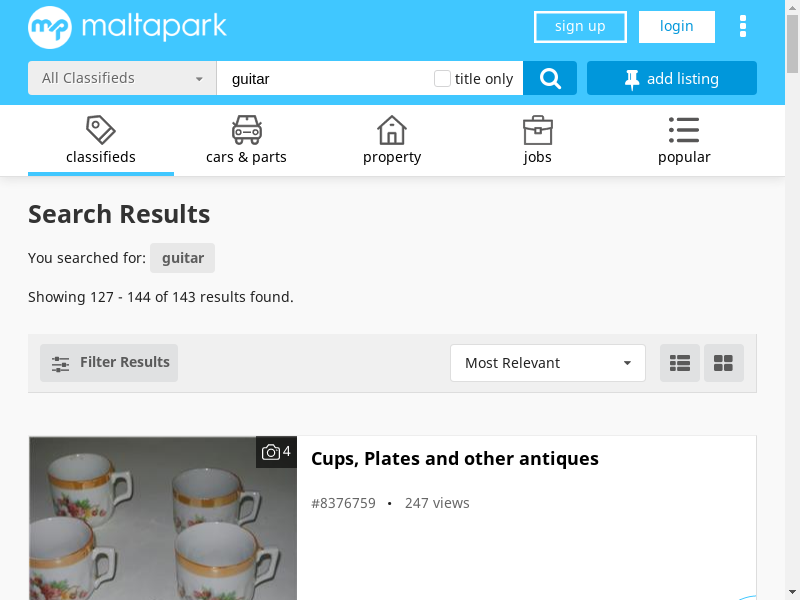

We are in iteration:7


In [ ]:
#@title
items = GetItems()
z=1
while True:
  try:
    time.sleep(1)
    Scroll_down(200)
    next_bt = wd.find_elements_by_css_selector("a")
    cururl = wd.current_url
    for x in next_bt:
      if x.text == "Next":
        try:
          x.click()
          break
        except:
          print("Oops")
    time.sleep(1)
    items = items.append(GetItems())
  except:
    break
  print("We are in iteration:" + str(z))
  if  wd.current_url == cururl:
    break
  ShowScreen()
  z=z+1

In [ ]:
#@title
items = items.reset_index()
items = items.drop(["index"],1)
items

,title,price,link
0,Vintage Lignatone Czechoslovakia Parlor Guitar...,90.00,https://maltapark.com/item/details/8519429
1,Guitars & Amp for sale,130,https://maltapark.com/item/details/8873286
2,"Guitars, Amps and Speakers",,https://maltapark.com/item/details/8734308
3,"WANTEDOld electric guitars, no matter what con...",,https://maltapark.com/item/details/6162557
4,Spanish Guitar,300,https://maltapark.com/item/details/8897971
...,...,...,...
157,LARGE PICTURE WITH FRAME,50.00,https://maltapark.com/item/details/5021580
158,WII GAME ROCKBAND ( NTSC ),15.00,https://maltapark.com/item/details/1336153
159,Wii games 5-15eu each,5.00,https://maltapark.com/item/details/8066530
160,Wii games 5-10eu,5.00,https://maltapark.com/item/details/7770633


In [ ]:
#@title
ls = []

for x in items["price"]:
  try:
    ls.append(float(x))
  except:
    ls.append(0)

items["price"] = ls

In [ ]:
#@title
items.describe()

,price
count,162.000000
mean,274.256049
std,1415.996023
min,0.000000
25%,10.000000
50%,55.000000
75%,147.500000
max,15000.000000




> **Price Distribution:**



In [ ]:
#@title
import plotly.express as px

grouped = items.groupby(["price"]).count().reset_index()
fig = px.scatter(grouped, x="price", y="title")
fig.show()


> **Most common keywords**


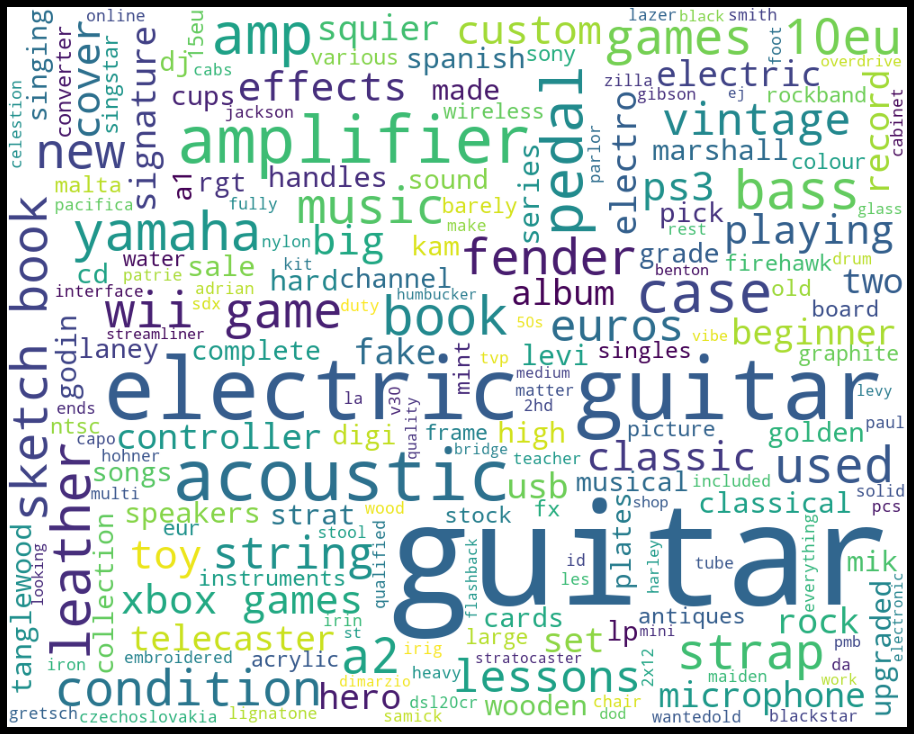

In [ ]:
#@title
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

text = " ".join(title for title in items["title"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white",width=1000, height=800).generate(text.lower())
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#@title
import os
pathout = "/content/drive/MyDrive/Colab Notebooks/Outputs"
os.chdir(pathout)
items.to_csv("Matapark_Scrape.csv",index=False)
